# **Petunjuk TTS**

Silakan simpan file ke dalam bentuk **TTS_NIM.ipynb**. Tuliskan koding untuk dapat menampilkan hasil seperti yang diminta. Setelah selesai mengerjakan, silakan unggah ke GClass. Jangan sampai terlambat ya...keterlambatan mengakibatkan pengurangan nilai TTS.

Have fun!

### **1. Import Libraries**

In [102]:
# Silakan import librari yang kalian butuhkan (pandas, numpy, matplotlib, seaborn, dan missingno)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import missingno as msno

In [103]:
# Ambil dataset dari (https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true) dan simpan dengan nama variabel data
data = pd.read_csv ('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col ='Unnamed: 0')

In [104]:
# Lihat 5 data teratas pada DataFrame "data"
data.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [106]:
# Cek tipe data dalam "data"
data.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

### **2. Membersihkan Data**

**Challenge 1**: Ganti `coordinates` dengan kolom `latitude` dan `longitude`

In [107]:
# Hapus tanda "(" dan ")" dari kolom coordinates
data['coordinates'] = data['coordinates'].str.replace("(","")
data['coordinates'] = data['coordinates'].str.replace(")","")

C:\Users\hp\AppData\Local\Temp/ipykernel_12248/2943789285.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coordinates'] = data['coordinates'].str.replace("(","")
C:\Users\hp\AppData\Local\Temp/ipykernel_12248/2943789285.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coordinates'] = data['coordinates'].str.replace(")","")


In [108]:
# Cetak 5 data paling atas dari kolom coordinates
data['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [109]:
# Lakukan split data di kolom coordinates, beri nama lat_long
lat_long = data['coordinates'].str.split(",", expand = True)

In [110]:
# Buat supaya latitude berisi nilai lat_long[0] dan longitude berisi nilai lat_long[1]
data['latitude']=lat_long[0]
data['longitude']=lat_long[1]

In [111]:
# Cetak data
data.head(10)

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354
5,271954,Beautiful brownstone apartment,1423798,Aj,"Manhattan, Greenwich Village","40.73388, -73.99452",Entire home/apt,150$,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15,40.73388,-73.99452
6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,"Manhattan, Harlem","40.8309, -73.94308000000002",Entire home/apt,200$,0,NaN,NaN,219,NaN,NaN,NaN,2018-05-05,40.8309,-73.94308000000002
7,14218742,Luxury/3bedroom/3bthrm/Privateprkng/beach/rstrnts,78824908,Ilona,"Brooklyn, Sheepshead Bay","40.58531, -73.93811",Entire home/apt,224$,2,2018-06-22,0.08,353,4.091228,2.4,0.690393,2017-12-17,40.58531,-73.93811
8,15125599,Beautiful One Bedroom Apartment Near Central Park,3191545,Kyle,"Manhattan, Theater District","40.761, -73.98522",Entire home/apt,169$,5,2017-06-25,0.15,365,3.562947,6.0,0.704538,2016-12-20,40.761,-73.98522
9,24553891,Enjoy all of Manhattan. Big Apple! A Mini-MOMA!,68557372,Shannon,"Manhattan, Harlem","40.80667, -73.95182",Entire home/apt,75$,8,2019-04-24,0.66,9,4.695769,9.6,0.750073,2018-10-19,40.80667,-73.95182


In [112]:
# Konversi nilai latitude dan longitude menjadi FLOAT
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

In [113]:
# Cek tipe data sekali lagi
data.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [49]:
# Hapus kolom coordinates
yg_dihapus = ['coordinates']
data.drop(yg_dihapus, inplace = True, axis = 1)

In [114]:
# Cetak data sekali lagi
data.head(5)

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


**Challenge 2**: Hapus `$` dari kolom `price` dan konversi ke `float`

In [115]:
# Hapus tanda dolar ($) dari kolom price sebelum nantinya akan kita konversi ke tipe data FLOAT
data['price'] = data['price'].str.strip('$') 


In [116]:
# Cetak untuk melihat apakah sudah terjadi perubahan pada kolom price
data['price'].head(5)

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [117]:
# Konversi kolom price ke bentuk FLOAT
data['price'] = data['price'].astype(float)

In [118]:
# Hitung nilai mean dari kolom price setelah dikonversi
data['price'].mean()

150.90512217564665

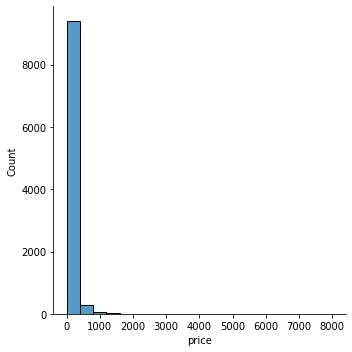

In [119]:
# Buat visualisasi distribusi dari kolom prices
sea.displot(data['price'], bins = 20)

**Challenge 3**: Kita buat supaya kolom `room_type` benar-benar rapi secara kategori.

In [120]:
# Cetak supaya tahu kategori apa saja yang ada di kolom `room_type`
data['room_type'].unique()


array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [121]:
# Buat supaya semua berubah menjadi huruf kecil
data['room_type']=data['room_type'].str.lower()
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [77]:
# Buat supaya tidak ada spasi di awal dan akhir
data['room_type']=data['room_type'].str.strip()
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [81]:
# Ganti menjadi kategori 'Shared room', 'Entire place', 'Private room' dan 'Hotel room'
mapping = {'private room' : 'Private Room',
        'private' : 'Private Room',
        'entire home/apt' : 'Entire Place',
        'shared room' : 'Shared Room',
         'home' : 'Hotel Room'}

for key in mapping.keys(): data['room_type']=data['room_type'].str.replace(key, mapping[key])




In [122]:
# Cek 5 data teratas untuk melihat perubahan yang terjadi
data.head(5)

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",entire home/apt,150.0,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


**Challenge 4**: Kita bersihkan **missing data**

In [92]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


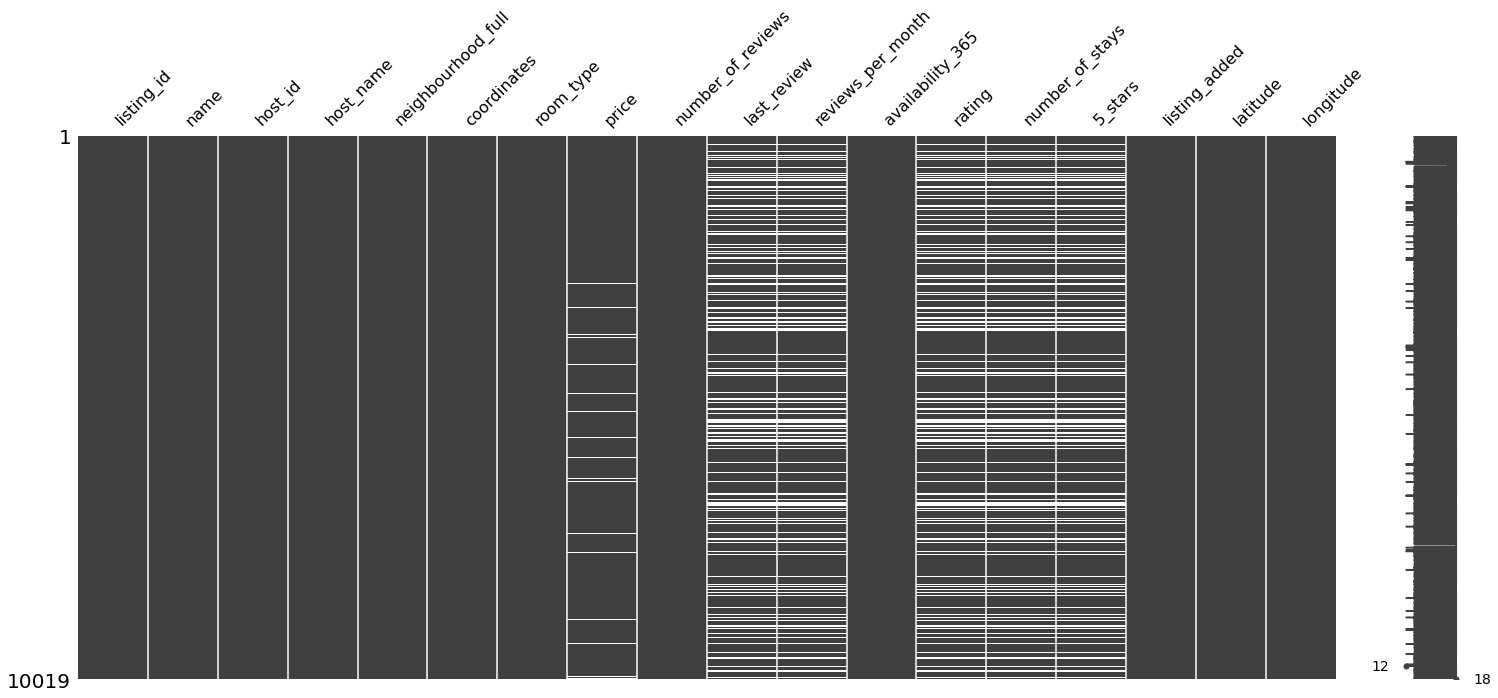

In [123]:
# Visualisasi missingness 
msno.matrix(data)
plt.show()

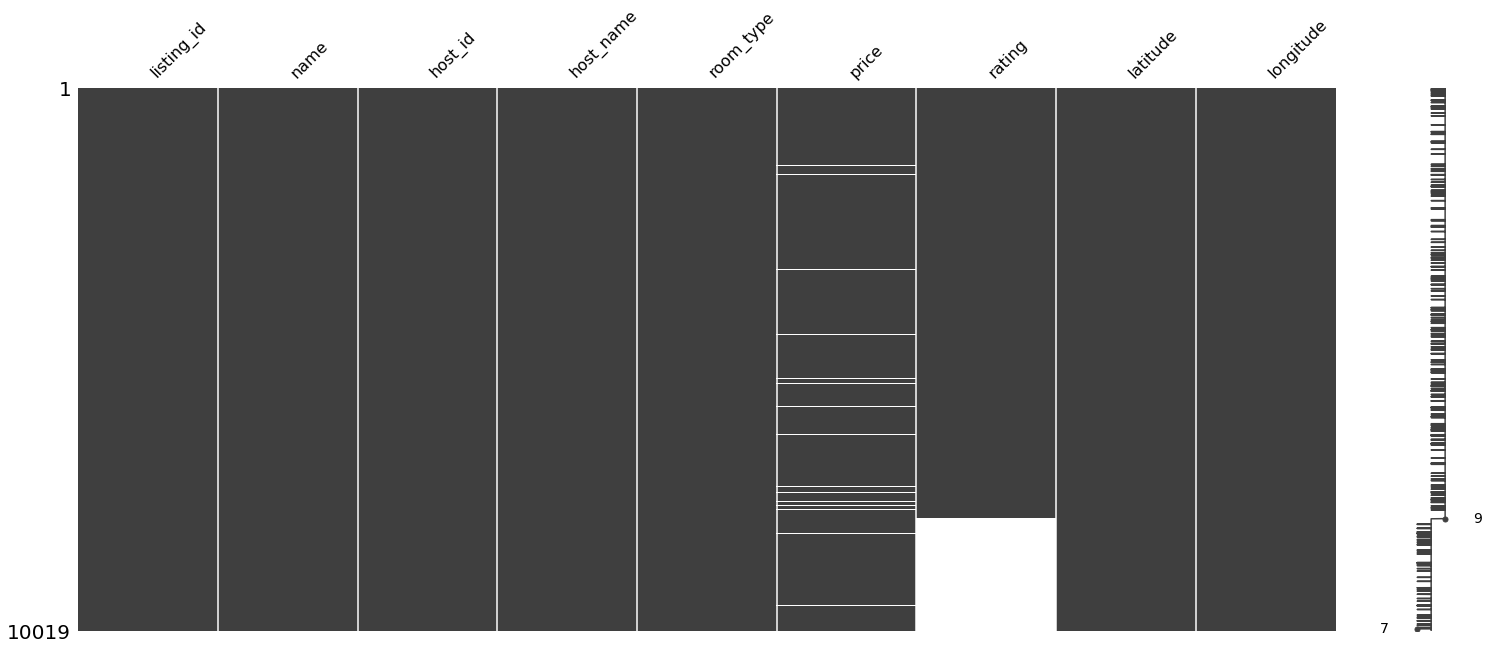

In [95]:
# Visualisasikan missingness berdasarkan rating
msno.matrix(data.sort_values(by ='rating'))
plt.show()

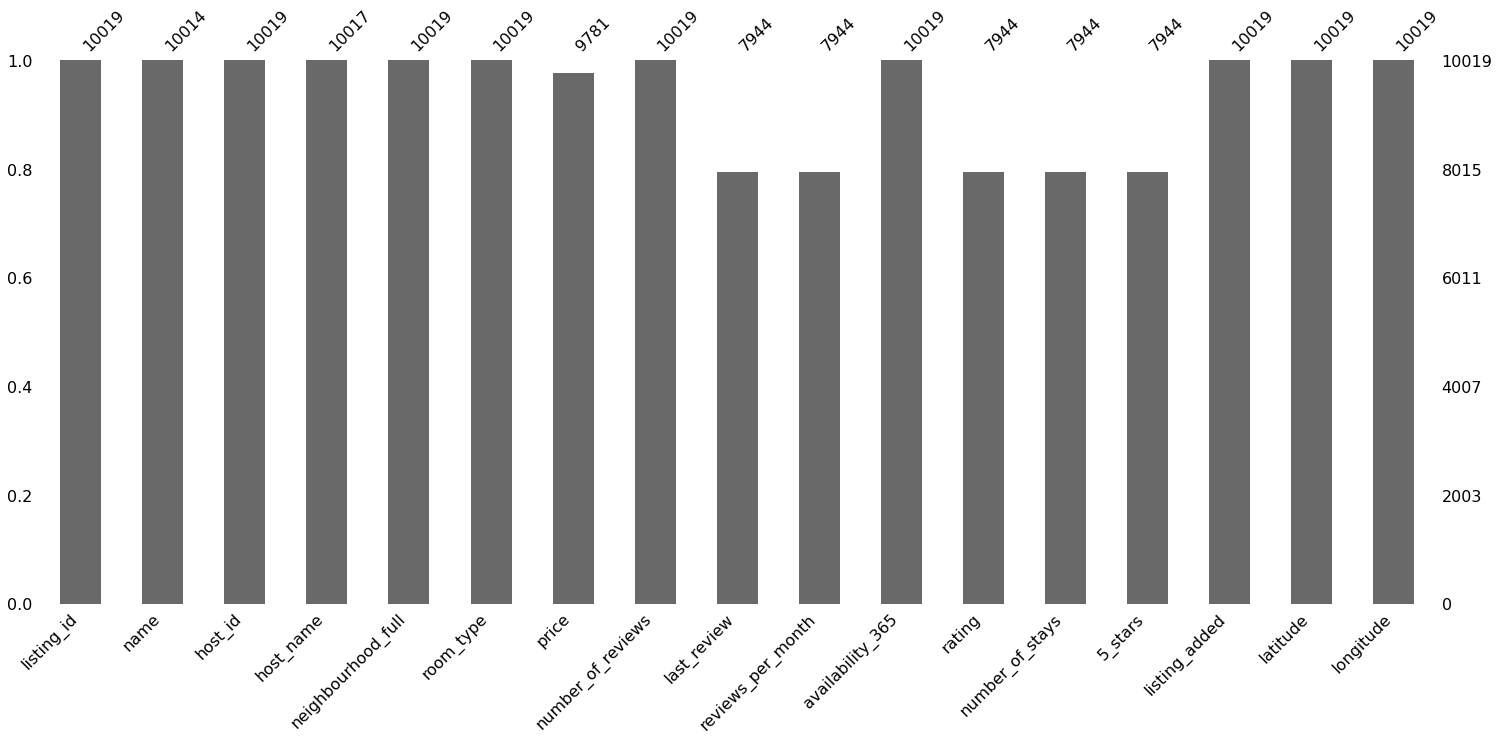

In [62]:
# Buat dalam bentuk barplot
msno.bar(data)

In [96]:
# Cek DataFrame yang ada missing values di kolom rating, number_of_stays, 5_stars, reviews_per_month
data[data['rating'].isna()].describe()

,listing_id,host_id,price,rating,latitude,longitude
count,2.075000e+03,2.075000e+03,2028.000000,0.0,2075.000000,2075.000000
mean,2.274238e+07,8.022455e+07,191.553748,NaN,40.732074,-73.956771
std,1.123730e+07,8.663163e+07,316.186639,NaN,0.051168,0.041065
min,6.358800e+04,1.475100e+04,0.000000,NaN,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,NaN,40.697845,-73.985185
50%,2.345182e+07,4.040116e+07,120.000000,NaN,40.727790,-73.960940
75%,3.400364e+07,1.333498e+08,205.250000,NaN,40.763480,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,NaN,40.911690,-73.727310


In [97]:
# Lakukan imputasi untuk missing data
data = data.fillna({'reviews_per_month':0,
                   'number_of_stays':0,
                   '5_stars':0})

In [99]:
# Buat kolom baru, beri nama sudah_dinilai
dinilai = np.where(data['rating'].isna() == True, 0, 1)
data['dinilai'] = dinilai

In [101]:
# Cek data
data.head()

,listing_id,name,host_id,host_name,room_type,price,rating,latitude,longitude,dinilai
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,4.100954,40.63222,-73.93398,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire Place,135.0,3.367600,40.78761,-73.96862,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire Place,150.0,NaN,40.70070,-73.99517,0
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire Place,86.0,4.763203,40.79169,-73.97498,1
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,3.822591,40.71884,-73.98354,1


**Challenge 5**: Hapus kolom-kolom berikut


1.   neighbourhood_full
2.   number_of_reviews
3.   last_review
4.   reviews_per_month
5.   availability_365
6.   number_of_stays
7.   5_stars
8.   listing_added









In [85]:
# Hapus beberapa kolom yang tidak dibutuhkan
yg_dihapus2 = ['neighbourhood_full','number_of_reviews', 'last_review', 'reviews_per_month', 'availability_365', 
               'number_of_stays', '5_stars', 'listing_added']
data.drop(yg_dihapus2, inplace = True, axis = 1)

In [86]:
# Tampilkan data
data.head(10)

,listing_id,name,host_id,host_name,room_type,price,rating,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,4.100954,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire Place,135.0,3.367600,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire Place,150.0,NaN,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire Place,86.0,4.763203,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,3.822591,40.71884,-73.98354
5,271954,Beautiful brownstone apartment,1423798,Aj,Entire Place,150.0,4.478396,40.73388,-73.99452
6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,Entire Place,200.0,NaN,40.83090,-73.94308
7,14218742,Luxury/3bedroom/3bthrm/Privateprkng/beach/rstrnts,78824908,Ilona,Entire Place,224.0,4.091228,40.58531,-73.93811
8,15125599,Beautiful One Bedroom Apartment Near Central Park,3191545,Kyle,Entire Place,169.0,3.562947,40.76100,-73.98522
9,24553891,Enjoy all of Manhattan. Big Apple! A Mini-MOMA!,68557372,Shannon,Entire Place,75.0,4.695769,40.80667,-73.95182
